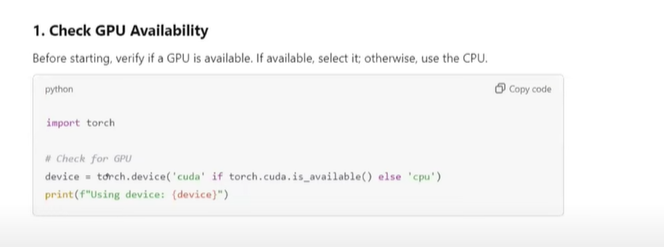

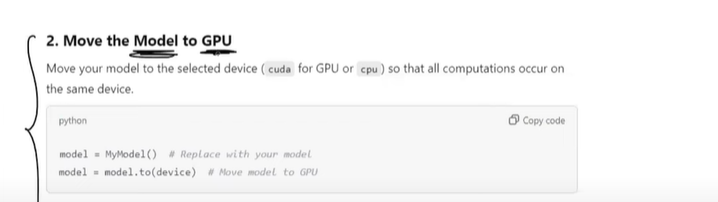

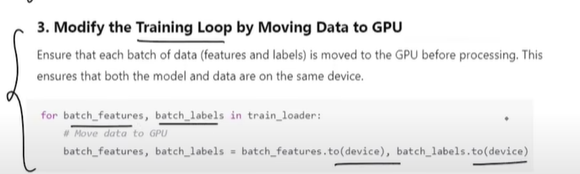

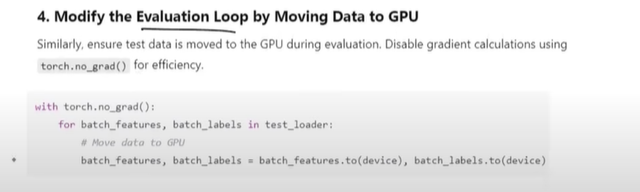

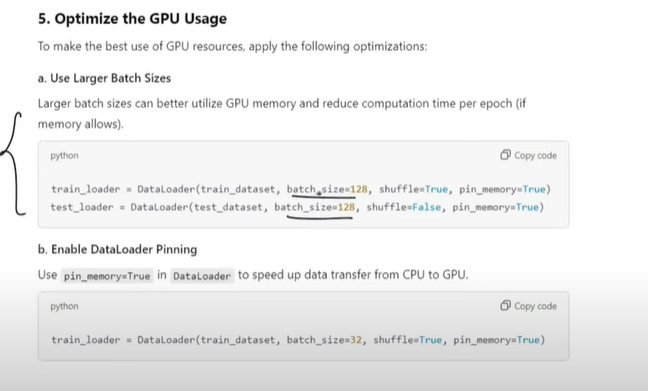

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
df=pd.read_csv('fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

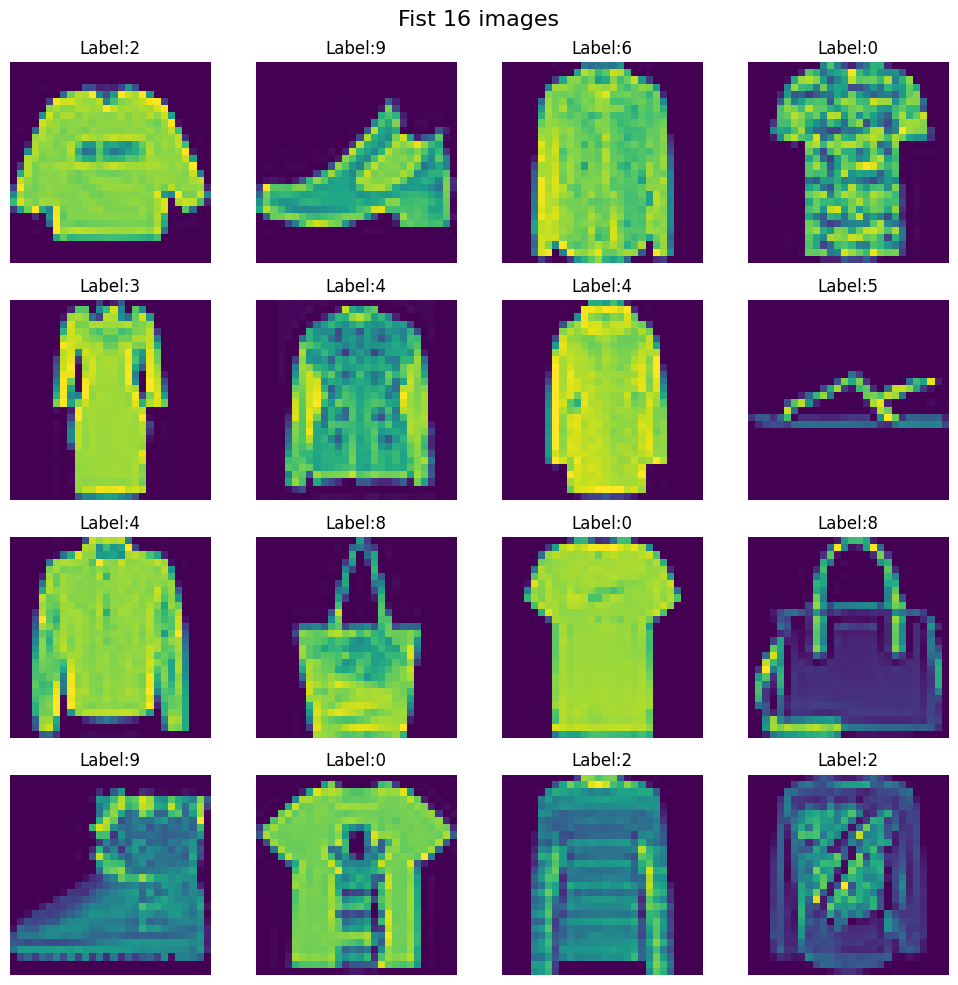

In [ ]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("Fist 16 images",fontsize=16)

for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label:{df.iloc[i,0]}")

plt.tight_layout()
plt.show()



In [ ]:
df.iloc[:,0].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# scaling the fetaures

X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,fetaures,labels):
    self.fetaures=torch.tensor(fetaures,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __getitem__(self,idx):
    return self.fetaures[idx],self.labels[idx]


  def __len__(self):
    return len(self.fetaures)



In [ ]:
train_dataset=CustomDataset(X_train,y_train)


In [ ]:
test_dataset=CustomDataset(X_test,y_test)

In [ ]:
# Data loader
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
# define NN class

class MyNN(nn.Module):

  def __init__(self,num_fetaures):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_fetaures,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)

    )

  def forward(self,x):
    return self.model(x)


In [ ]:
epochs=100
learning_rate=0.1

In [ ]:
model=MyNN(X_train.shape[1])
model.to(device)

criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
len(train_loader)

1500

In [ ]:
for epoch in range(epochs):

  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    outputs=model(batch_features)

    loss=criterion(outputs,batch_labels)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    total_epoch_loss=total_epoch_loss+loss.item()

  print(f"Epoch:{epoch+1}/{epochs}, Loss:{total_epoch_loss/len(train_loader)}")




Epoch:1/100, Loss:0.6352872474888961
Epoch:2/100, Loss:0.4304986953884363
Epoch:3/100, Loss:0.3861262078657746
Epoch:4/100, Loss:0.3584607255011797
Epoch:5/100, Loss:0.3376494748592377
Epoch:6/100, Loss:0.32276468626906474
Epoch:7/100, Loss:0.3078539018382629
Epoch:8/100, Loss:0.2949818898836772
Epoch:9/100, Loss:0.2854692505300045
Epoch:10/100, Loss:0.27467058210571604
Epoch:11/100, Loss:0.26830569267148774
Epoch:12/100, Loss:0.2581421597401301
Epoch:13/100, Loss:0.24940819991752505
Epoch:14/100, Loss:0.24444738873218497
Epoch:15/100, Loss:0.2385919222868979
Epoch:16/100, Loss:0.23155899402375021
Epoch:17/100, Loss:0.22562562982489665
Epoch:18/100, Loss:0.2202964697740972
Epoch:19/100, Loss:0.21206334652379155
Epoch:20/100, Loss:0.20960091769819458
Epoch:21/100, Loss:0.20624992956593632
Epoch:22/100, Loss:0.19986103242821993
Epoch:23/100, Loss:0.1953041393881043
Epoch:24/100, Loss:0.19312163671137145
Epoch:25/100, Loss:0.18764107141271233
Epoch:26/100, Loss:0.18366442496639987
Epoch:2

In [ ]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# drop outsare off while prediction,also batch  normalization setting is also changed

In [ ]:
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:

    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    outputs=model(batch_features)

    _,predicted=torch.max(outputs,1)

    total=total+batch_labels.size(0)

    correct=correct+(predicted==batch_labels).sum().item()

print(f"Accuracy:{correct/total}")


Accuracy:0.8898333333333334


In [ ]:
# To improve accuracy of model:
# 1. Use full Dataset
# 2. and Use GPU
# use different optimizers,diff learning rates,diff epochs,diff weight init tech,architechture

